## Import Dependencies

In [2]:
#import libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



## Load Data

In [3]:
file_path = os.path.join(os.path.dirname('./'), 'train.csv')
data = pd.read_csv(file_path)

In [4]:
# Check the first few rows of the data
data.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


## EDA

In [5]:
# Check the shape of the data (number of rows and columns)
data.shape

(67914, 8)

In [6]:
# Check the data types of each column
data.dtypes

image_id       object
class_name     object
class_id        int64
rad_id         object
x_min         float64
y_min         float64
x_max         float64
y_max         float64
dtype: object

In [7]:
# Check for missing values
data.isnull().sum()

image_id          0
class_name        0
class_id          0
rad_id            0
x_min         31818
y_min         31818
x_max         31818
y_max         31818
dtype: int64

In [8]:
# Check basic statistics of numerical columns
data.describe()

,class_id,x_min,y_min,x_max,y_max
count,67914.000000,36096.000000,36096.000000,36096.000000,36096.000000
mean,9.979312,1051.332696,1065.262051,1492.269337,1456.660489
std,5.036494,565.838078,552.925133,595.384126,581.134138
min,0.000000,0.000000,0.000000,68.000000,103.000000
25%,7.000000,602.000000,627.000000,1010.000000,1009.000000
50%,13.000000,1014.500000,935.000000,1567.000000,1411.000000
75%,14.000000,1457.000000,1471.000000,1947.000000,1911.000000
max,14.000000,2934.000000,3133.000000,3131.000000,3384.000000


            class_name  counts
0           No finding   31818
1   Aortic enlargement    7162
2         Cardiomegaly    5427
3   Pleural thickening    4842
4   Pulmonary fibrosis    4655
5          Nodule/Mass    2580
6         Lung Opacity    2483
7     Pleural effusion    2476
8         Other lesion    2203
9         Infiltration    1247
10                 ILD    1000
11       Calcification     960
12       Consolidation     556
13         Atelectasis     279
14        Pneumothorax     226


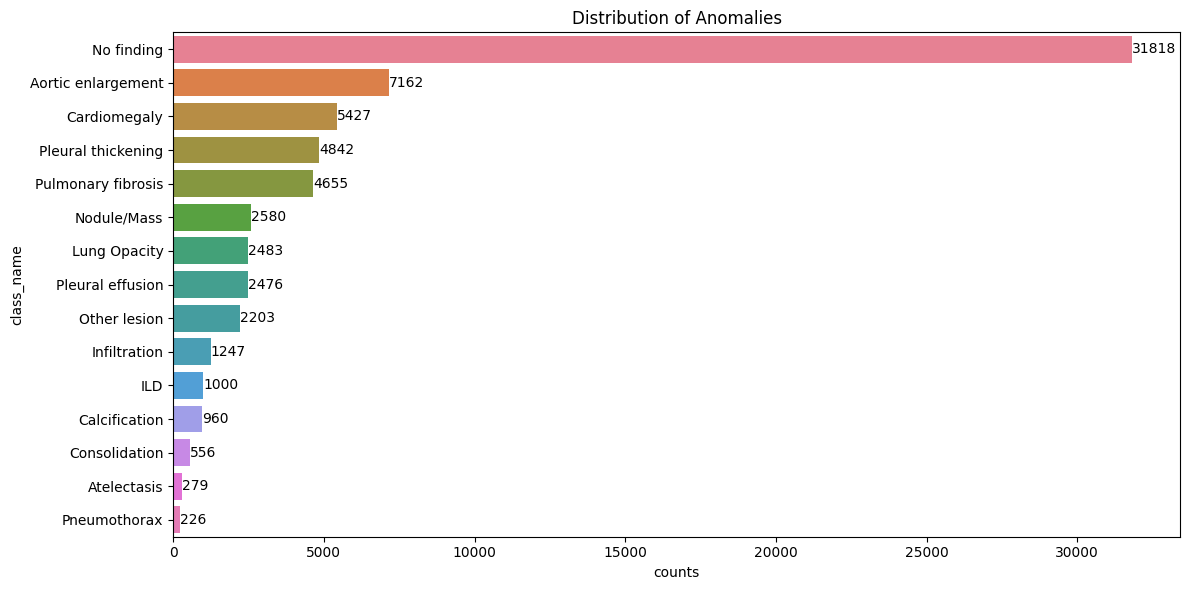

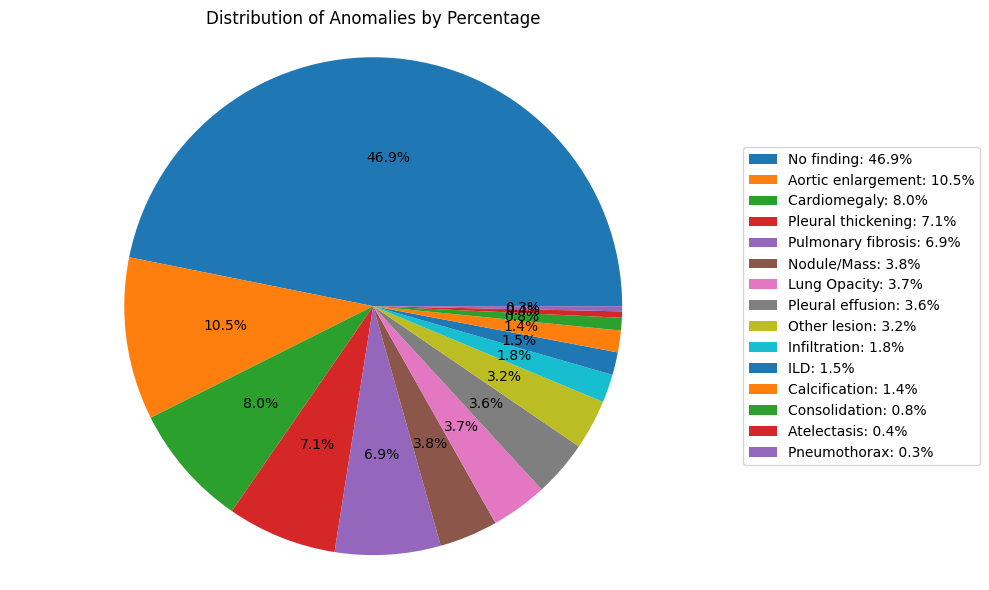

   rad_id  counts
0      R9   15708
1     R10   13292
2      R8   12198
3      R2    3121
4      R5    2783
5      R3    2285
6      R6    2041
7      R1    1995
8     R13    1824
9     R15    1823
10    R16    1763
11     R7    1733
12    R12    1729
13    R11    1670
14    R14    1624
15     R4    1513
16    R17     812


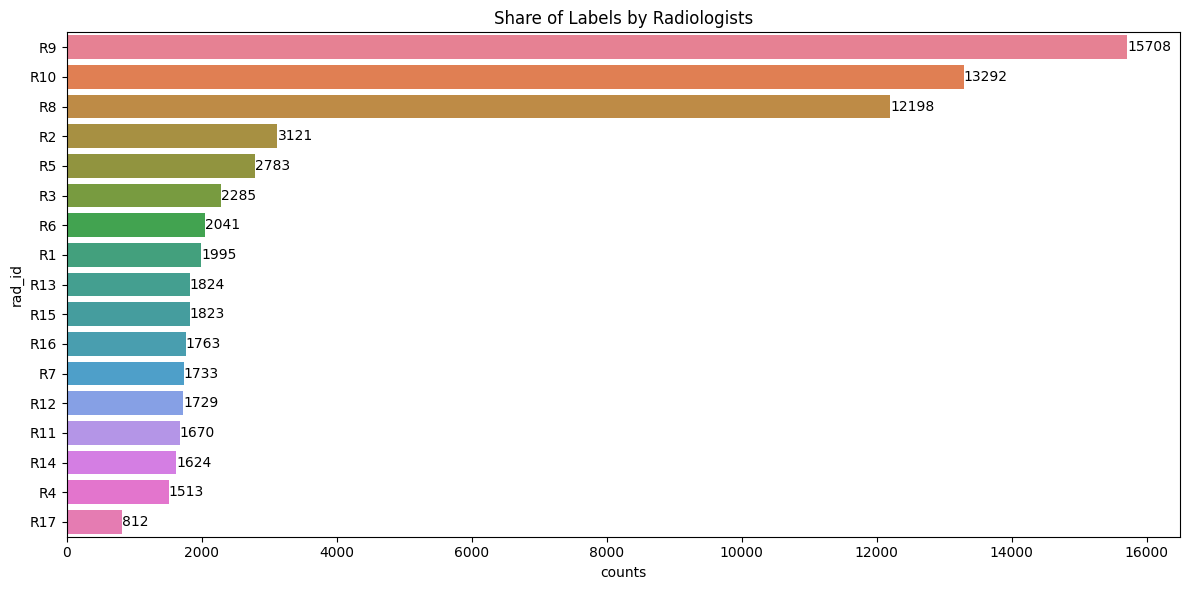

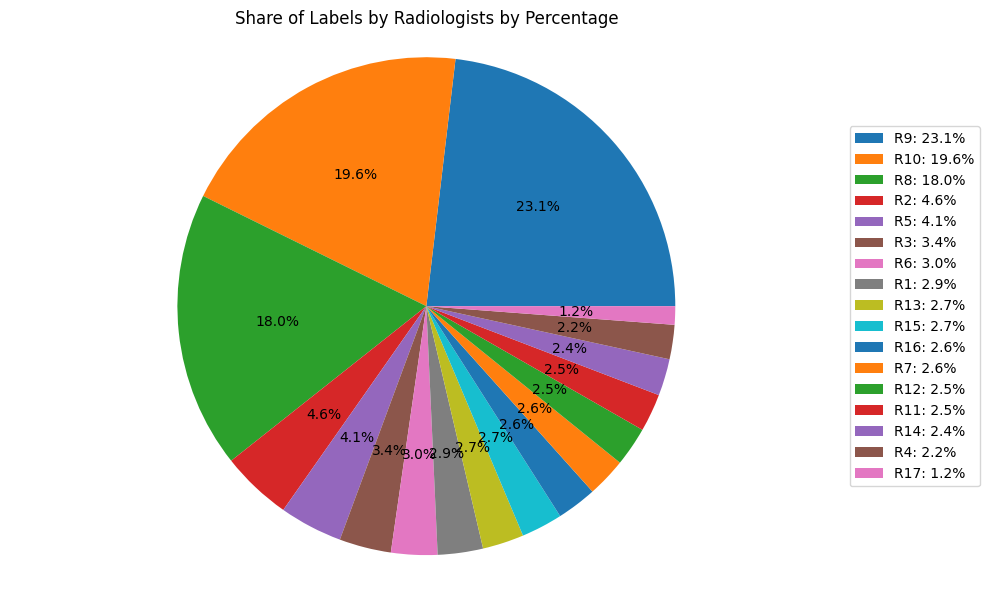

                               image_id  counts
0      03e6ecfa6f6fb33dfeac6ca4f9b459c9      57
1      fa109c087e46fe1ea27e48ce6d154d2f      52
2      e31be972e181987a8600a8700c1ebe88      48
3      6d5acf3f8a973a26844d617fffe72998      46
4      3a302fbbbf3364aa1a7731b59e6b98ec      46
...                                 ...     ...
14995  be353c629cd9b269bbcb6623339283ae       3
14996  43b0f51d257ee4154014ef7724a82644       3
14997  9a4ed54cefaea64fc59bf8debdc79ec9       3
14998  3018e6640df6a1e3f9978cf55c8d0fd3       3
14999  839b2311ffad9bdd9aa98c74aad6e251       3

[15000 rows x 2 columns]


In [9]:

def plot_categorical_distributions(categorical_variable, data, bar_title, pie_title, bar_bool=True, pie_bool=True):
    class_counts = data[categorical_variable].value_counts().rename_axis(categorical_variable).reset_index(name='counts')
    print(class_counts)

    ############### Bar Chart ###############
    if bar_bool:
        # Check the distribution of the anomaly class
        fig, ax = plt.subplots(figsize=(12, 6))
        sns.barplot(y=categorical_variable, x='counts', data=class_counts, ax=ax, hue=categorical_variable, order=class_counts[categorical_variable])
        for container in ax.containers:
            ax.bar_label(container)
        ax.set_title(bar_title)
        plt.tight_layout()
        plt.show()

    ############### Pie Chart ###############
    if pie_bool:
        # Calculate percentage for each class manually
        class_counts['percentage'] = (class_counts['counts'] / class_counts['counts'].sum()) * 100

        # Plot pie chart without labels on the slices but with autopct to show percentages
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.pie(class_counts['counts'], autopct='%1.1f%%')

        # Create custom labels for the legend by combining class name and percentage
        labels = [f'{row[categorical_variable]}: {row.percentage:.1f}%' for index, row in class_counts.iterrows()]

        # Set legend with custom labels
        ax.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5))

        # Equal aspect ratio ensures that pie is drawn as a circle.
        ax.axis('equal')
        ax.set_title(pie_title)
        plt.tight_layout()
        plt.show()


plot_categorical_distributions('class_name', data, 'Distribution of Anomalies', 'Distribution of Anomalies by Percentage', True, True)
plot_categorical_distributions('rad_id', data, 'Share of Labels by Radiologists', 'Share of Labels by Radiologists by Percentage', True, True)
plot_categorical_distributions('image_id', data, _, _, False, False)

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

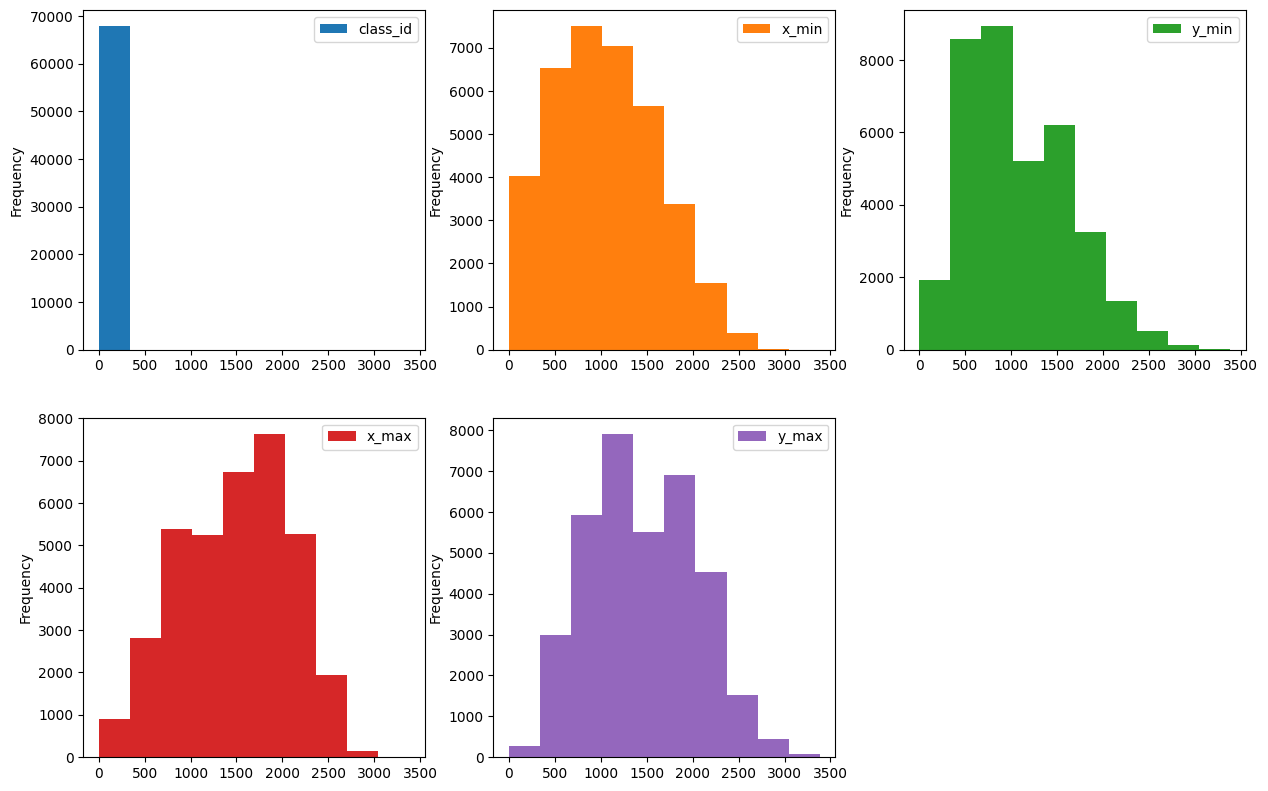

In [10]:
# Check the distribution of numerical columns
data.drop(columns=['image_id', 'class_name', 'rad_id']).plot(kind = 'hist', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,15))

<Axes: >

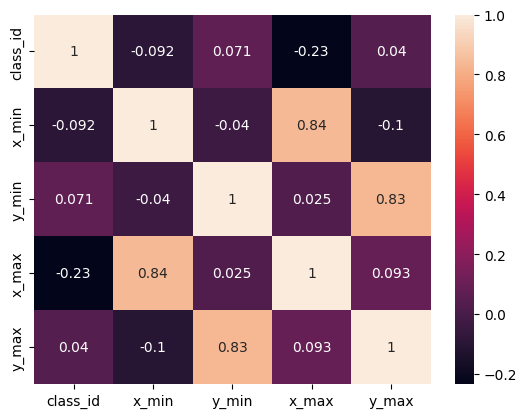

In [11]:
# Check the correlation between numerical columns
sns.heatmap(data.drop(columns=['image_id', 'class_name', 'rad_id']).corr(), annot=True)

## Data Preprocessing

### Image conversion to compatible format

In [12]:
# convert images to jpeg, supported by YOLOv8

import dicom_convert as dconv

dicom_folder = r"C:\Users\cassm\OneDrive\Desktop\vinbigdata-chest-xray-abnormalities-detection\train"

In [13]:
'''# To convert to JPEG
output_folder = r"C:\Users\cassm\OneDrive\Desktop\vinbigdata-chest-xray-abnormalities-detection\images_jpg"
dconv.convert_dicom_to_jpeg(dicom_folder, output_folder)'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 41-42: truncated \UXXXXXXXX escape (2739365383.py, line 3)

In [ ]:
'''# To convert to PNG
output_folder = r"C:\Users\cassm\OneDrive\Desktop\vinbigdata-chest-xray-abnormalities-detection\images_png"
dconv.convert_dicom_to_png(dicom_folder, output_folder)'''

In [ ]:
'''# To convert to TIFF
output_folder = r"C:\Users\cassm\OneDrive\Desktop\vinbigdata-chest-xray-abnormalities-detection\images_tiff"
dconv.convert_dicom_to_tiff(dicom_folder, output_folder)'''

### Data Sampling: Group classes by number of instances -> Stratify by Class_Name ->  Random Sampling

In [ ]:
def count(categorical_variable, data):
    class_counts = data[categorical_variable].value_counts().rename_axis(categorical_variable).reset_index(name='counts')
    print(class_counts)

data_count = count('class_id', data)

    class_id  counts
0         14   31818
1          0    7162
2          3    5427
3         11    4842
4         13    4655
5          8    2580
6          7    2483
7         10    2476
8          9    2203
9          6    1247
10         5    1000
11         2     960
12         4     556
13         1     279
14        12     226


In [ ]:
# Define the range of counts for each group
count_ranges = [0, 10, 20, 30, 40, np.inf]
group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

# Group the classes based on the count ranges
data_count['class_group'] = pd.cut(data_count['counts'], bins=count_ranges, labels=group_labels)

# Print the updated dataframe
print(data)


TypeError: 'NoneType' object is not subscriptable

In [ ]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

filename = get_testdata_files(r"C:\Users\cassm\OneDrive\Desktop\vinbigdata-chest-xray-abnormalities-detection\train\00b05e693202bb65a0c0ca7a0201495d.dicom")[0]
ds = pydicom.dcmread(filename)
plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 

NotImplementedError: Non-relative patterns are unsupported

c:\Users\cassm\anaconda3\envs\yolov8\Lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


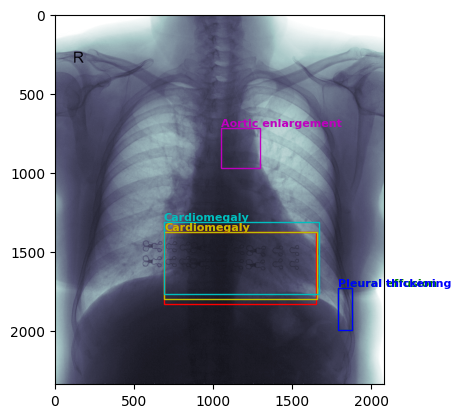

                               image_id          class_name  class_id rad_id  \
2      9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3    R10   
5517   9a5094b2563a1ef3ff50dc5c7ff71345    Pleural effusion        10     R9   
25023  9a5094b2563a1ef3ff50dc5c7ff71345  Pleural thickening        11     R9   
26165  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3     R9   
42709  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3     R8   
53473  9a5094b2563a1ef3ff50dc5c7ff71345  Aortic enlargement         0     R9   

        x_min   y_min   x_max   y_max  
2       691.0  1375.0  1653.0  1831.0  
5517   1789.0  1729.0  1875.0  1992.0  
25023  1789.0  1729.0  1875.0  1992.0  
26165   692.0  1375.0  1657.0  1799.0  
42709   689.0  1313.0  1666.0  1763.0  
53473  1052.0   715.0  1299.0   966.0  


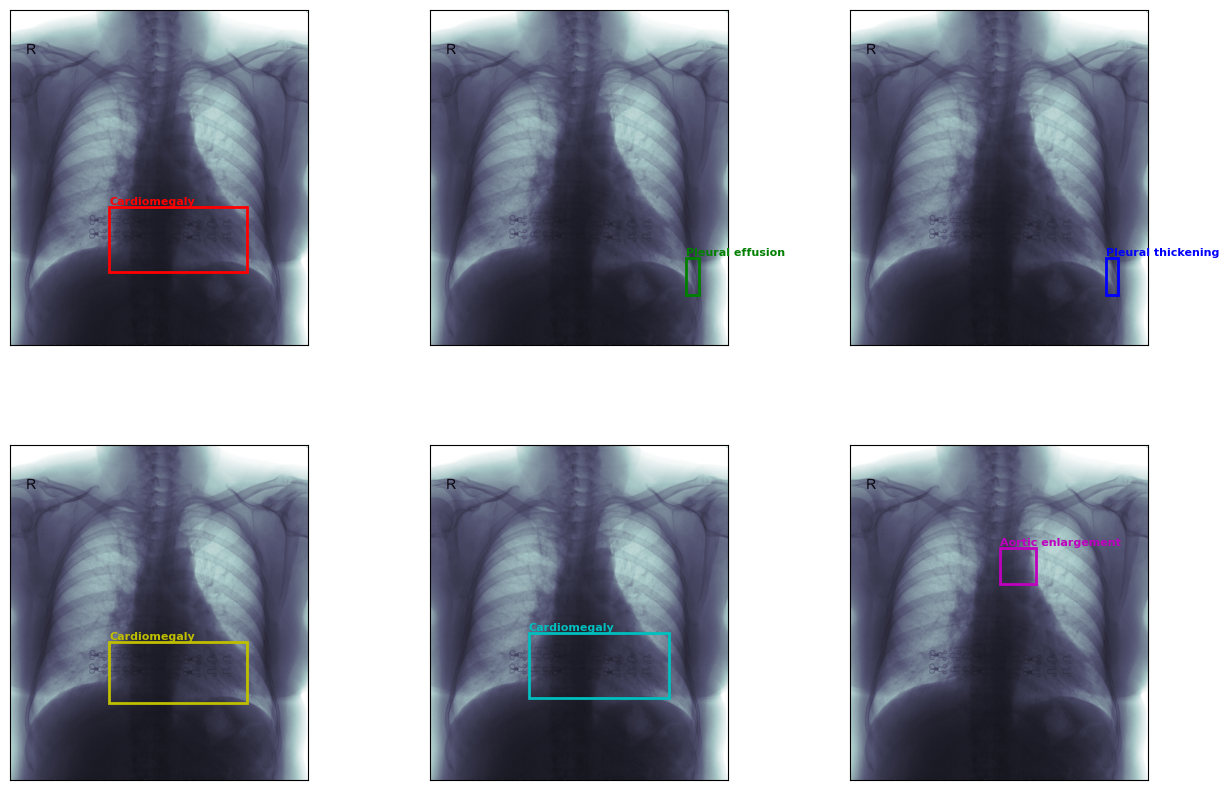

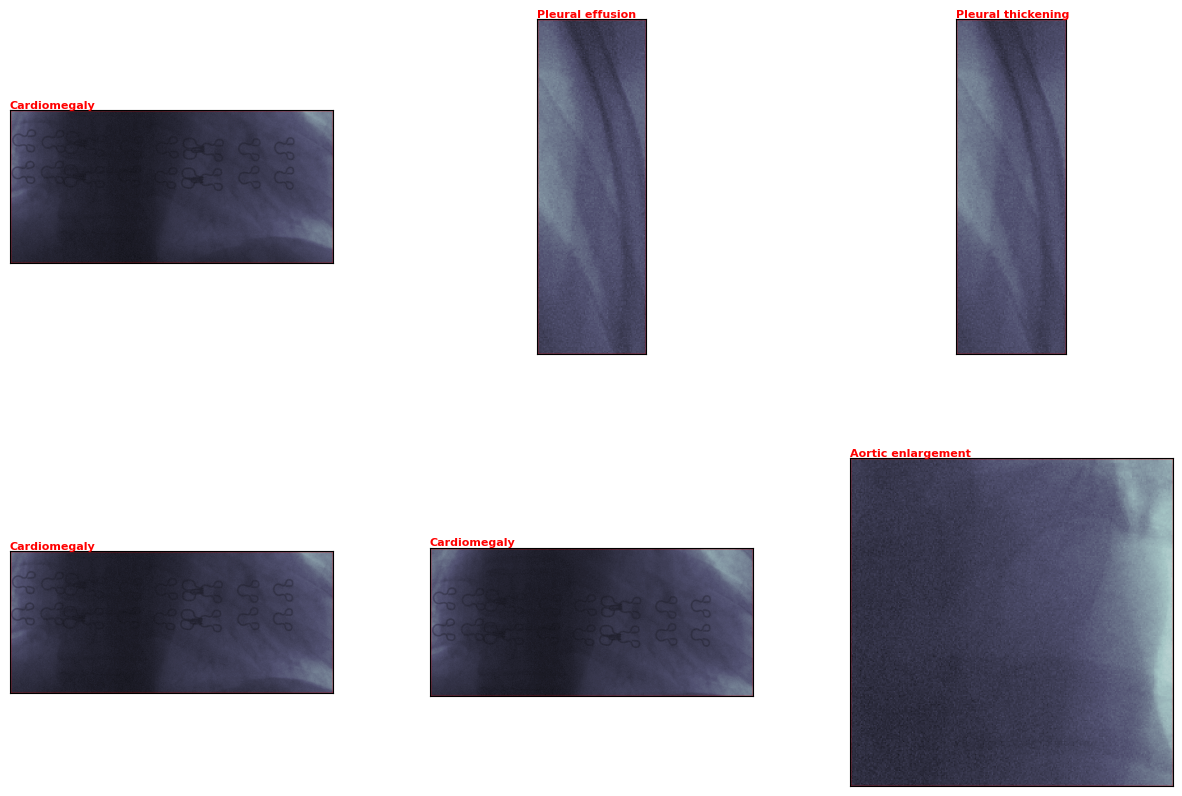

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pydicom

# Provide the full path to the DICOM file
filename = r"C:\Users\cassm\OneDrive\Desktop\vinbigdata-chest-xray-abnormalities-detection\train\9a5094b2563a1ef3ff50dc5c7ff71345.dicom"
image_id = os.path.splitext(os.path.basename(filename))[0]

ds = pydicom.dcmread(filename)

# Find the bounding box for the image_id in the dataframe
bounding_boxes = data[data['image_id'] == image_id]

# Display the image
fig, ax = plt.subplots(1)
ax.imshow(ds.pixel_array, cmap=plt.cm.bone)

# Colors for different instances
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'brown', 'pink']
color_idx = 0

# Draw the bounding boxes and labels
for index, row in bounding_boxes.iterrows():
    # Create a Rectangle patch
    x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']
    width, height = x_max - x_min, y_max - y_min
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor=colors[color_idx % len(colors)], facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    # Add label
    label = row['class_name']
    ax.text(x_min, y_min, label, color=colors[color_idx % len(colors)], weight='bold', fontsize=8, ha='left', va='bottom')

    color_idx += 1

plt.show()

print(bounding_boxes)

################Show each bounding box separately####################

####Same plot for each bounding box####

# Determine the number of bounding boxes to create appropriate subplot grid
n_boxes = len(bounding_boxes)
n_cols = 3  # Number of columns in subplot grid
n_rows = n_boxes // n_cols + (n_boxes % n_cols > 0)  # Ensure enough rows to display all boxes

# Create a single figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust space between plots

# Flatten the axis array for easy indexing if it's not already flat
if n_boxes == 1:
    axs = [axs]
elif n_rows > 1:
    axs = axs.flatten()

# Colors for different instances
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'brown', 'pink']

for idx, (index, row) in enumerate(bounding_boxes.iterrows()):
    ax = axs[idx]
    ax.imshow(ds.pixel_array, cmap=plt.cm.bone)
    
    # Draw each bounding box
    color = colors[idx % len(colors)]
    x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']
    rect = patches.Rectangle((x_min, y_min), x_max-x_min, y_max-y_min, linewidth=2, edgecolor=color, facecolor='none')
    ax.add_patch(rect)
    
    # Add label
    label = row['class_name']
    ax.text(x_min, y_min, label, color=color, weight='bold', fontsize=8, ha='left', va='bottom')

    # Keep the view to show the whole image
    ax.set_xlim([0, ds.pixel_array.shape[1]])
    ax.set_ylim([ds.pixel_array.shape[0], 0])  # Inverted because y-coordinates go from top to bottom

    # Optional: Remove axis ticks for cleanliness
    ax.set_xticks([])
    ax.set_yticks([])

# Hide any unused subplots
for ax in axs[n_boxes:]:
    ax.axis('off')

plt.show()

####Separate plot for each bounding box####

'''# Draw separate figs for each bounding box
for index, row in bounding_boxes.iterrows():
    fig, ax = plt.subplots(1)
    ax.imshow(ds.pixel_array, cmap=plt.cm.bone)

    # Create a Rectangle patch
    x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']
    width, height = x_max - x_min, y_max - y_min
    color = colors[index % len(colors)]  # Cycle through colors
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor=color, facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    # Add label
    label = row['class_name']
    ax.text(x_min, y_min, label, color=color, weight='bold', fontsize=8, ha='left', va='bottom')

    plt.show()'''

################Only Show Images Inside the Bounding Boxes####################

# Determine the number of bounding boxes to create appropriate subplot grid
n_boxes = len(bounding_boxes)
n_cols = 3  # Number of columns in subplot grid
n_rows = n_boxes // n_cols + (n_boxes % n_cols > 0)  # Ensure enough rows to display all boxes

# Create a single figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust space between plots

# Flatten the axis array for easy indexing
axs = axs.flatten()

# Loop through bounding boxes and create subplots
for idx, (index, row) in enumerate(bounding_boxes.iterrows()):
    ax = axs[idx]
    ax.imshow(ds.pixel_array, cmap=plt.cm.bone)
    
    # Draw the bounding box and label
    x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']
    width, height = x_max - x_min, y_max - y_min
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
    # Add label
    label = row['class_name']
    ax.text(x_min, y_min, label, color='r', weight='bold', fontsize=8, ha='left', va='bottom')
    
    # Set the subplot's view to the bounding box
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_max, y_min])  # Inverted because y-coordinates go from top to bottom in images
    
    # Optional: Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

# Hide any unused subplots
for ax in axs[n_boxes:]:
    ax.axis('off')

plt.show()

## Create Train, Validation, and Test Datasets

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# Load the dataset
dataset_path = r"C:\Users\cassm\OneDrive\Desktop\Code_Repo\DeepRadiology\train.csv"
df = pd.read_csv(dataset_path)

# Randomly sample 5000 images from the dataset
df_sampled = df.sample(n=5000, random_state=42)

# Define the root folder for saving subsets
root_folder = r"C:\Users\cassm\OneDrive\Desktop\Code_Repo\DeepRadiology\subsets"

# Ensure the existence of directories for saving subsets
for folder in ['random', 'stratified']:
    os.makedirs(os.path.join(root_folder, folder), exist_ok=True)

# Random Sampling
# Splitting the sampled dataset into train (70%), and temp (30%) initially
train_df, temp_df = train_test_split(df_sampled, test_size=0.3, random_state=42)

# Further split the temp into validation (20%) and test (10%) datasets based on the original dataset
validate_df, test_df = train_test_split(temp_df, test_size=1/3, random_state=42)

# Save the random splits
train_df.to_csv(os.path.join(root_folder, 'random', 'train.csv'), index=False)
validate_df.to_csv(os.path.join(root_folder, 'random', 'validate.csv'), index=False)
test_df.to_csv(os.path.join(root_folder, 'random', 'test.csv'), index=False)

# Stratified Sampling
# Splitting the sampled dataset into train (70%), and temp (30%) initially with stratification
train_strat_df, temp_strat_df = train_test_split(df_sampled, test_size=0.3, stratify=df_sampled['class_id'], random_state=42)

# Further split the temp into validation (20%) and test (10%) datasets based on the original dataset with stratification
validate_strat_df, test_strat_df = train_test_split(temp_strat_df, test_size=1/3, stratify=temp_strat_df['class_id'], random_state=42)

# Save the stratified splits
train_strat_df.to_csv(os.path.join(root_folder, 'stratified', 'train.csv'), index=False)
validate_strat_df.to_csv(os.path.join(root_folder, 'stratified', 'validate.csv'), index=False)
test_strat_df.to_csv(os.path.join(root_folder, 'stratified', 'test.csv'), index=False)

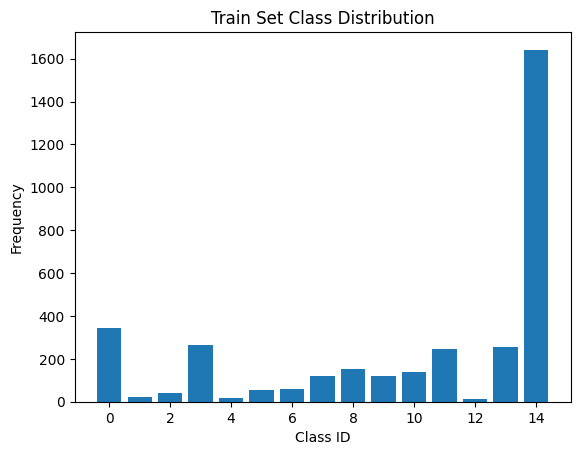

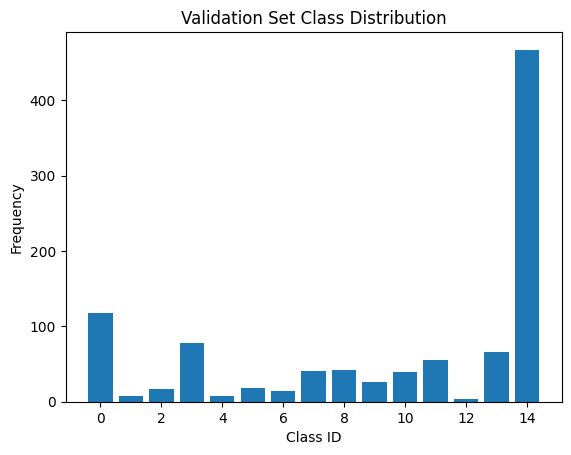

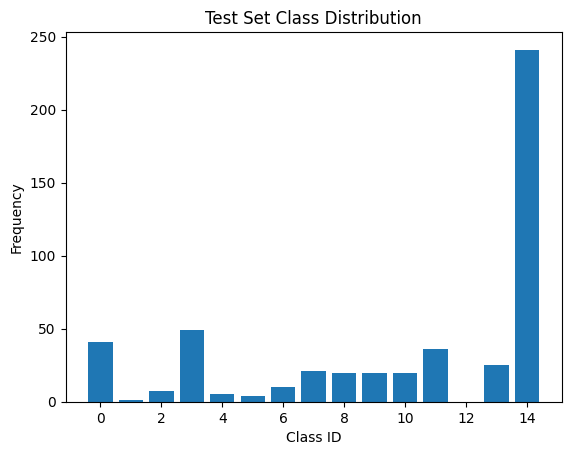

In [18]:
# Function to plot class distribution

def plot_class_distribution(df, title):

    class_counts = df['class_id'].value_counts().sort_index()

    plt.bar(class_counts.index, class_counts.values)

    plt.title(title)

    plt.xlabel('Class ID')

    plt.ylabel('Frequency')

    plt.show()



# Plotting class distributions for each dataset

plot_class_distribution(train_df, 'Train Set Class Distribution')

plot_class_distribution(validate_df, 'Validation Set Class Distribution')

plot_class_distribution(test_df, 'Test Set Class Distribution')

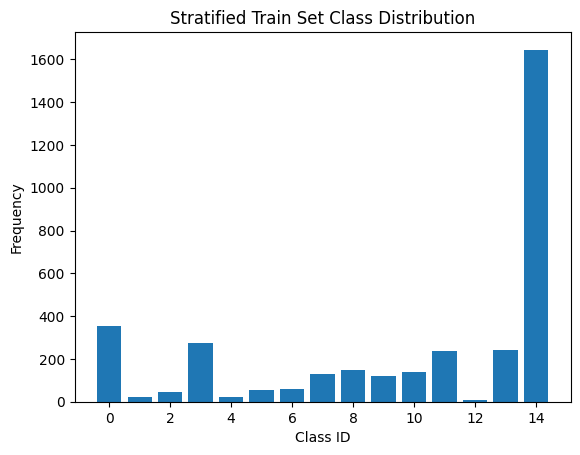

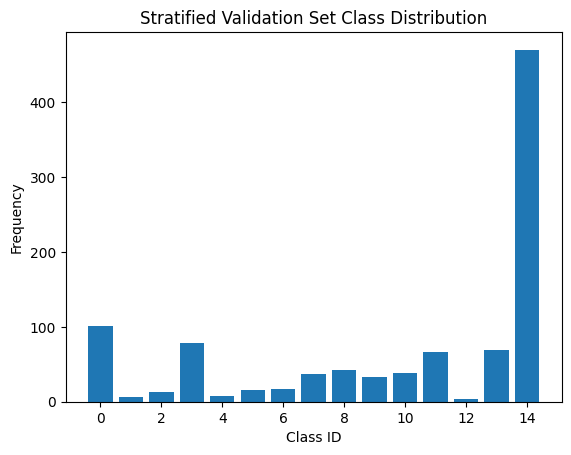

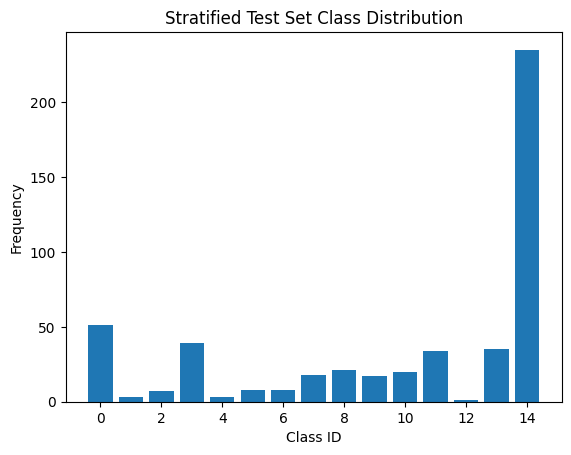

In [19]:
plot_class_distribution(train_strat_df, 'Stratified Train Set Class Distribution')

plot_class_distribution(validate_strat_df, 'Stratified Validation Set Class Distribution')

plot_class_distribution(test_strat_df, 'Stratified Test Set Class Distribution')

## Convert Bounding Box Co-ordinates to Tiff for the Subsets

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


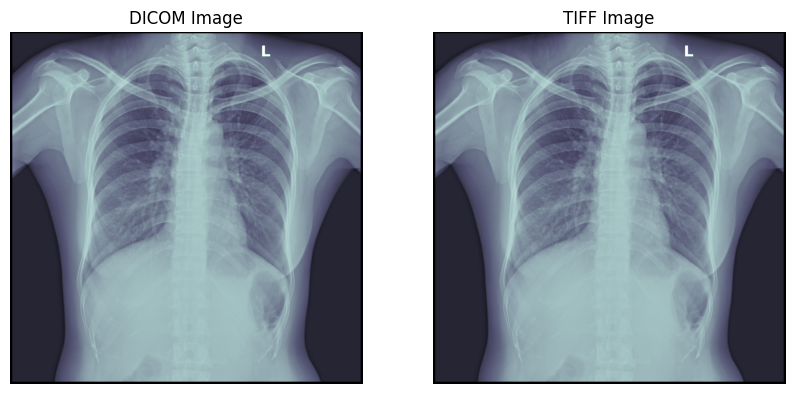

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


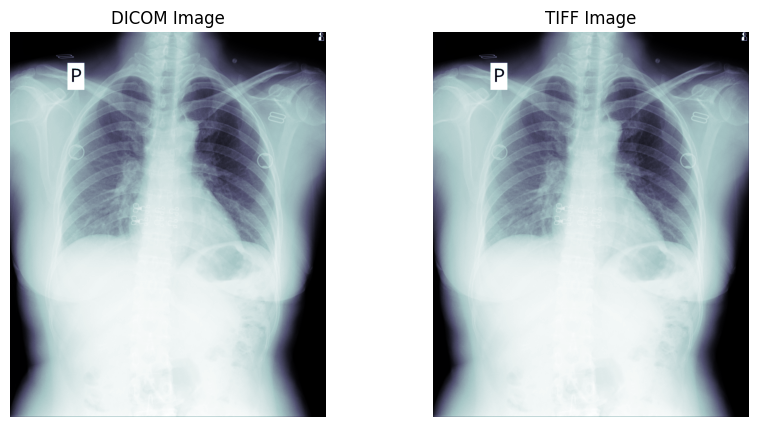

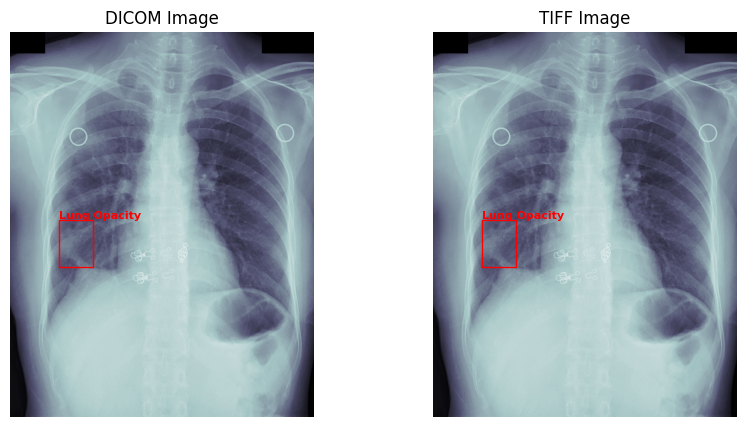

c:\Users\cassm\anaconda3\envs\yolov8\Lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


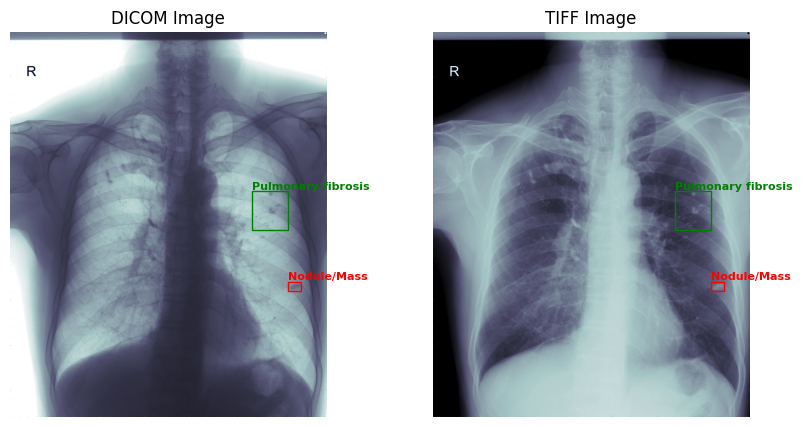

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


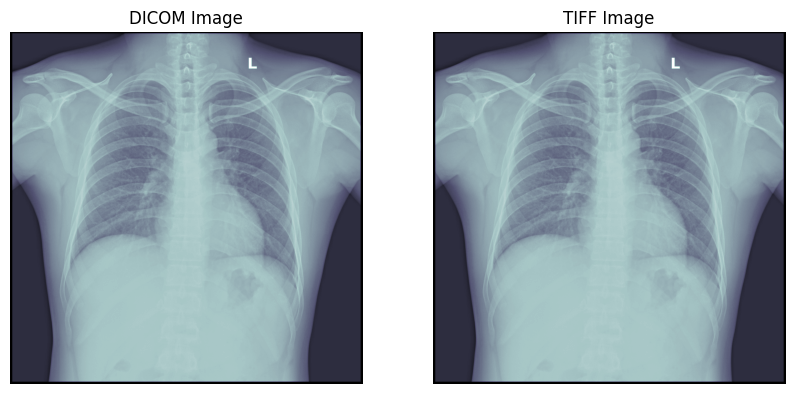

In [46]:
import pandas as pd
import pydicom
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import random

# Function to draw bounding boxes on image
def draw_bounding_boxes(image_path, bounding_boxes, is_dicom, ax):
    # Read the image
    if is_dicom:
        dicom_file = pydicom.dcmread(image_path)
        image = dicom_file.pixel_array
        # Convert to 8-bit grayscale image for display
        #image = (image / np.max(image) * 255).astype(np.uint8)'''
        # Display the image
        ax.imshow(image, cmap=plt.cm.bone)
    else:
        image = Image.open(image_path)
        ax.imshow(image, cmap=plt.cm.bone)

    # Colors for different instances
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'brown', 'pink']
    color_idx = 0

    # Draw the bounding boxes and labels
    for index, row in bounding_boxes.iterrows():
        x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']
        width, height = x_max - x_min, y_max - y_min
        # Create a Rectangle patch
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor=colors[color_idx % len(colors)], facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)
        # Add label
        label = row['class_name']
        ax.text(x_min, y_min, label, color=colors[color_idx % len(colors)], weight='bold', fontsize=8, ha='left', va='bottom')
        color_idx += 1

# Load the dataset
csv_path = r"C:\Users\cassm\OneDrive\Desktop\Code_Repo\DeepRadiology\subsets\random\train.csv"
data = pd.read_csv(csv_path)

# Select 5 random rows
sample_data = data.sample(n=5)

# Directories containing the DICOM and TIFF files
dicom_dir = r"C:\Users\cassm\OneDrive\Desktop\vinbigdata-chest-xray-abnormalities-detection\train"
tiff_dir = r"C:\Users\cassm\OneDrive\Desktop\vinbigdata-chest-xray-abnormalities-detection\images_tiff"

# Display images
for _, row in sample_data.iterrows():
    image_id = row['image_id']
    # Select bounding boxes for this image_id
    bounding_boxes = data[data['image_id'] == image_id]

    # Set up the figure and axes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    # Draw bounding boxes on DICOM image
    dicom_path = os.path.join(dicom_dir, image_id + '.dicom')  # Adjust extension if necessary
    draw_bounding_boxes(dicom_path, bounding_boxes, is_dicom=True, ax=ax1)
    ax1.set_title('DICOM Image')
    ax1.axis('off')
    
    # Draw bounding boxes on TIFF image
    tiff_path = os.path.join(tiff_dir, image_id + '.tiff')  # Adjust extension if necessary
    draw_bounding_boxes(tiff_path, bounding_boxes, is_dicom=False, ax=ax2)
    ax2.set_title('TIFF Image')
    ax2.axis('off')
    
    plt.show()


In [51]:
import pandas as pd
import json
from glob import glob
import os
import shutil

def add_image_resolution_to_dataframe(df, image_id_column, root_directory):
    """
    Adds two new columns to a DataFrame with the width and height of images,
    constructing the image paths from the root directory and image IDs.

    Parameters:
    - df: The DataFrame containing image IDs.
    - image_id_column: The name of the column in the DataFrame that contains the image IDs.
    - root_directory: The root directory where the images are stored.

    The function directly modifies the input DataFrame by adding 'image_width' and 'image_height' columns.
    """
    width, height = 0, 0
    
    for image_id in df[image_id_column]:
        # Construct the full image path assuming TIFF format
        image_path = os.path.join(root_directory, f"{image_id}.tiff")
        
        try:
            with Image.open(image_path) as img:
                if img.format == 'TIFF':
                    width = img.size[0]
                    height = img.size[1]
                else:
                    width = 0
                    height = 0
                    print(f"Warning: The file {image_path} is not a TIFF image.")
        except FileNotFoundError:
            print(f"Error: The file {image_path} was not found.")
            width = None
            height = None
        except Exception as e:
            print(f"An error occurred with file {image_path}: {e}")
            width = None
            height = None

    df['image_width'] = width
    df['image_height'] = height

def dataframe_to_coco_json(df, output_json_path):
    """
    Converts a DataFrame containing image annotations to COCO format and saves it as a JSON file.

    Parameters:
    - df: DataFrame with columns ['image_id', 'class_id', 'x_min', 'x_max', 'y_min', 'y_max', 'img_width', 'img_height'].
    - output_json_path: Path to save the output COCO JSON file.
    """
    # Initialize COCO dataset structure
    coco_format = {
        "images": [],
        "annotations": [],
        "categories": []
    }
    
    annotation_id = 1  # Unique ID for each annotation
    images_processed = set()  # Keep track of processed images to avoid duplication
    
    # Populate categories (assuming class IDs are continuous and start from 0)
    class_ids = df['class_id'].unique()
    for class_id in class_ids:
        coco_format['categories'].append({
            "id": int(class_id),
            "name": str(class_id)  # Placeholder, replace with actual class names if available
        })
    
    for _, row in df.iterrows():
        image_id = row['image_id']
        if image_id not in images_processed:
            coco_format['images'].append({
                "id": image_id,
                "width": int(row['image_width']),
                "height": int(row['image_height']),
                "file_name": f"{image_id}.tiff"  # Assuming images are in JPG format
            })
            images_processed.add(image_id)
        
        # Calculate normalized bbox
        x_min, x_max, y_min, y_max = row['x_min'], row['x_max'], row['y_min'], row['y_max']
        img_width, img_height = row['image_width'], row['image_height']
        x_center = ((x_min + x_max) / 2) / img_width
        y_center = ((y_min + y_max) / 2) / img_height
        width = (x_max - x_min) / img_width
        height = (y_max - y_min) / img_height
        
        # Add annotation
        coco_format['annotations'].append({
            "id": annotation_id,
            "image_id": image_id,
            "category_id": int(row['class_id']),
            "bbox": [x_center, y_center, width, height],
            "area": width * height,
            "iscrowd": 0
        })
        
        annotation_id += 1

    # Save the COCO formatted data to a JSON file
    with open(output_json_path, 'w') as json_file:
        json.dump(coco_format, json_file, indent=4)

def process_csvs_to_coco_json(root_directory):
    """
    Finds all CSV files within the root directory and subdirectories,
    converts them to COCO JSON format, and saves them in the same directory.
    """
    # Find all CSV files in the directory and its subdirectories
    csv_files = glob(os.path.join(root_directory, '**', '*.csv'), recursive=True)
    
    for csv_file in csv_files:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_file)
        
        # Construct the output JSON path
        output_json_path = csv_file.rsplit('.', 1)[0] + '.json'

        # Add image resolution to the DataFrame
        add_image_resolution_to_dataframe(df, 'image_id', r"C:\Users\cassm\OneDrive\Desktop\vinbigdata-chest-xray-abnormalities-detection\images_tiff")
        
        # Convert the DataFrame to COCO JSON and save
        dataframe_to_coco_json(df, output_json_path)
        print(f"Processed {csv_file} to {output_json_path}")

# Process CSV files in the given directories
random_json_path = r"C:\Users\cassm\OneDrive\Desktop\Code_Repo\DeepRadiology\subsets\random"
stratified_json_path = r"C:\Users\cassm\OneDrive\Desktop\Code_Repo\DeepRadiology\subsets\stratified"

process_csvs_to_coco_json(random_json_path)
process_csvs_to_coco_json(stratified_json_path)

Processed C:\Users\cassm\OneDrive\Desktop\Code_Repo\DeepRadiology\subsets\random\test.csv to C:\Users\cassm\OneDrive\Desktop\Code_Repo\DeepRadiology\subsets\random\test.json
Processed C:\Users\cassm\OneDrive\Desktop\Code_Repo\DeepRadiology\subsets\random\train.csv to C:\Users\cassm\OneDrive\Desktop\Code_Repo\DeepRadiology\subsets\random\train.json
Processed C:\Users\cassm\OneDrive\Desktop\Code_Repo\DeepRadiology\subsets\random\validate.csv to C:\Users\cassm\OneDrive\Desktop\Code_Repo\DeepRadiology\subsets\random\validate.json
Processed C:\Users\cassm\OneDrive\Desktop\Code_Repo\DeepRadiology\subsets\stratified\test.csv to C:\Users\cassm\OneDrive\Desktop\Code_Repo\DeepRadiology\subsets\stratified\test.json
Processed C:\Users\cassm\OneDrive\Desktop\Code_Repo\DeepRadiology\subsets\stratified\train.csv to C:\Users\cassm\OneDrive\Desktop\Code_Repo\DeepRadiology\subsets\stratified\train.json
Processed C:\Users\cassm\OneDrive\Desktop\Code_Repo\DeepRadiology\subsets\stratified\validate.csv to C